In [1]:
import h5py
import glob
import numpy as np
import matplotlib.pyplot as plt

Draft

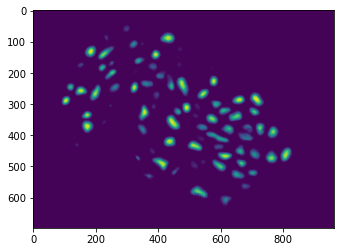

In [2]:
with h5py.File("/g/kreshuk/yu/Outputs/TMody2021Ovules/1613_prediction.h5", 'r') as f:
    prob = f['predictions'][:]
    
plt.imshow(prob[len(prob)//2])

(-0.01477094, 0.89904064)

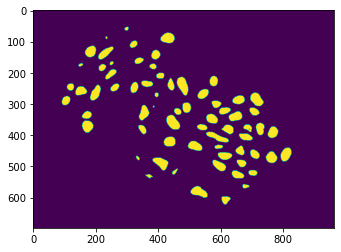

In [3]:
plt.imshow(prob[len(prob)//2] > 0.1)
prob.min(), prob.max()

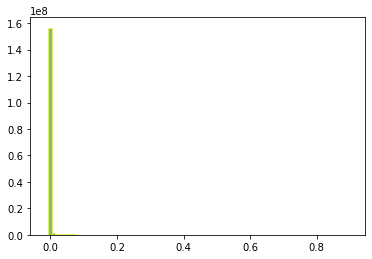

In [4]:
HIST_BINS = np.linspace(prob.min(), prob.max(), 100)
plt.hist(prob.flatten(), HIST_BINS, lw=1, ec="yellow", fc="green", alpha=0.5);

In [5]:
from skimage.measure import label

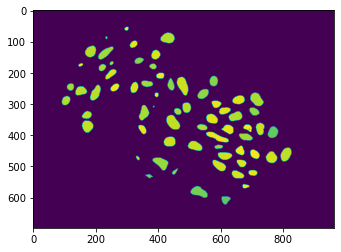

In [6]:
labelled = label(prob > 0.1)
plt.imshow(labelled[len(prob)//2])

In [7]:
with h5py.File("/g/kreshuk/yu/Outputs/TMody2021Ovules/1613_threshold.h5", 'w') as f:
    f.create_dataset('segmentation', data=labelled.astype(np.float32), compression='gzip')

Run thresholding for all

In [8]:
path_list_prob = glob.glob("/g/kreshuk/yu/Outputs/TMody2021Ovules/*merged.h5")
path_list_prob

['/g/kreshuk/yu/Outputs/TMody2021Ovules/1613_merged.h5',
 '/g/kreshuk/yu/Outputs/TMody2021Ovules/1614_merged.h5',
 '/g/kreshuk/yu/Outputs/TMody2021Ovules/1615_merged.h5',
 '/g/kreshuk/yu/Outputs/TMody2021Ovules/1616_merged.h5',
 '/g/kreshuk/yu/Outputs/TMody2021Ovules/1617_merged.h5']

In [9]:
for path_prob in path_list_prob:
    path_out = path_prob[:-9]+'threshold_0.1.h5'
    with h5py.File(path_prob, 'r') as f:
        prob = f['probability'][:]
        labelled = label(prob > 0.1)
    with h5py.File(path_out, 'w') as f:
        f.create_dataset('segmentation', 
                         data=labelled.astype(np.float32), 
                         compression='gzip')